In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

import imblearn

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import gridspec
from collections import Counter
from imblearn.over_sampling import SMOTE

import copy
import math
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [2]:
data = pd.read_csv("/creditcard.csv")

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [4]:
#Summarize Class Distribution
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 492})


In [5]:
#Over sample the Fraud Class (Minority) using SMOTE

#Transform the Dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
#Summarize Class Distribution
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


In [8]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (380982, 30) y_train.shape (380982,)
X_test.shape (187648, 30) y_test.shape (187648,)


In [10]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
X_train.shape

(380982, 30)

In [12]:
X_test.shape

(187648, 30)

In [13]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [14]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 64)                1984      
                                                                 
 L2 (Dense)                  (None, 32)                2080      
                                                                 
 L3 (Dense)                  (None, 16)                528       
                                                                 
 L4 (Dense)                  (None, 1)                 17        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
  152/25399 [..............................] - ETA: 8s - loss: 332.4753 - accuracy: 0.5018   

2024-09-05 17:42:37.721222: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25399/25399 [==============================] - 8s 312us/step - loss: 13.7234 - accuracy: 0.7546
Epoch 2/40
25399/25399 [==============================] - 8s 311us/step - loss: 0.6967 - accuracy: 0.5147
Epoch 3/40
25399/25399 [==============================] - 8s 312us/step - loss: 0.6291 - accuracy: 0.5911
Epoch 4/40
25399/25399 [==============================] - 8s 311us/step - loss: 0.3209 - accuracy: 0.8766
Epoch 5/40
25399/25399 [==============================] - 8s 311us/step - loss: 0.1854 - accuracy: 0.9440
Epoch 6/40
25399/25399 [==============================] - 8s 311us/step - loss: 0.2506 - accuracy: 0.8920
Epoch 7/40
25399/25399 [==============================] - 8s 313us/step - loss: 0.7008 - accuracy: 0.5012
Epoch 8/40
25399/25399 [==============================] - 8s 312us/step - loss: 0.7067 - accuracy: 0.5001
Epoch 9/40
25399/25399 [==============================] - 8s 314us/step - loss: 0.6975 - accuracy: 0.4991
Epoch 10/40
25399/25399 [==============================]

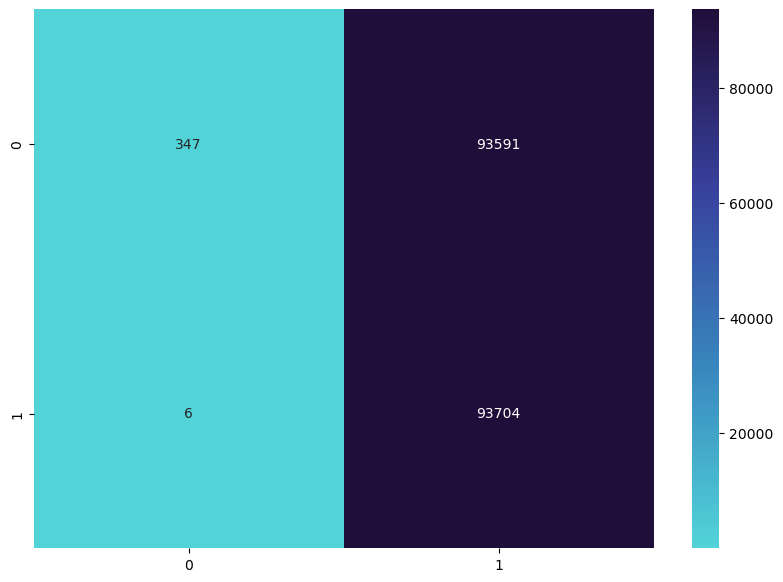

Test Data Accuracy: 0.5012


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        tf.keras.Input(shape=(30,)),
        Dense(64, activation='relu', name = "L1"),
        Dense(32, activation='relu', name = "L2"),
        Dense(16, activation='relu', name = "L3"),
        Dense(1, activation='sigmoid', name = "L4"),
        #Dense(1, activation='sigmoid', name = "L4") 
    ],
)
model.summary()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=40)

score = model.evaluate(X_test, y_test)

print(score)

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.colors as mcolors

# Define the custom colormap
colors = ['#52D3D8', '#3887BE', '#38419D', '#200E3A']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Assuming y_pred and y_test are defined as in your code
y_pred = model.predict(X_test)

# Binarize the predictions
y_pred = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
df_cm = pd.DataFrame(cm, index=[0, 1], columns=[0, 1])

# Plot the confusion matrix with the custom color scheme
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm, annot=True, fmt='g', cmap=cmap)
plt.show()

# Print the accuracy
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))